<a href="https://colab.research.google.com/github/aborbala/tree-canopy/blob/main/04_03_compare_results_with_deepforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install DeepForest
!pip install geopandas rasterio fiona shapely pyproj

In [ ]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
from deepforest import main
import matplotlib.pyplot as plt
import torch

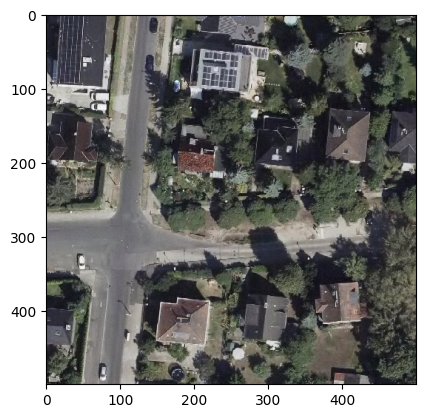

<Axes: >

In [ ]:
# Assuming the file is named 'image.tif'
tiff_file = '/content/drive/MyDrive/data/400_5816/sliced_output_2020S/3dm_33_400_5816_1_be_nobuild_4_2.tif'

# Open the GeoTIFF file
with rasterio.open(tiff_file) as src:
    img = src.read()
    profile = src.profile

# Display the image
show(img)

In [ ]:
# Initialize the model
model = main.deepforest()
# Load the pre-trained model
model.use_release()

Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


No validation file provided. Turning off validation loop
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


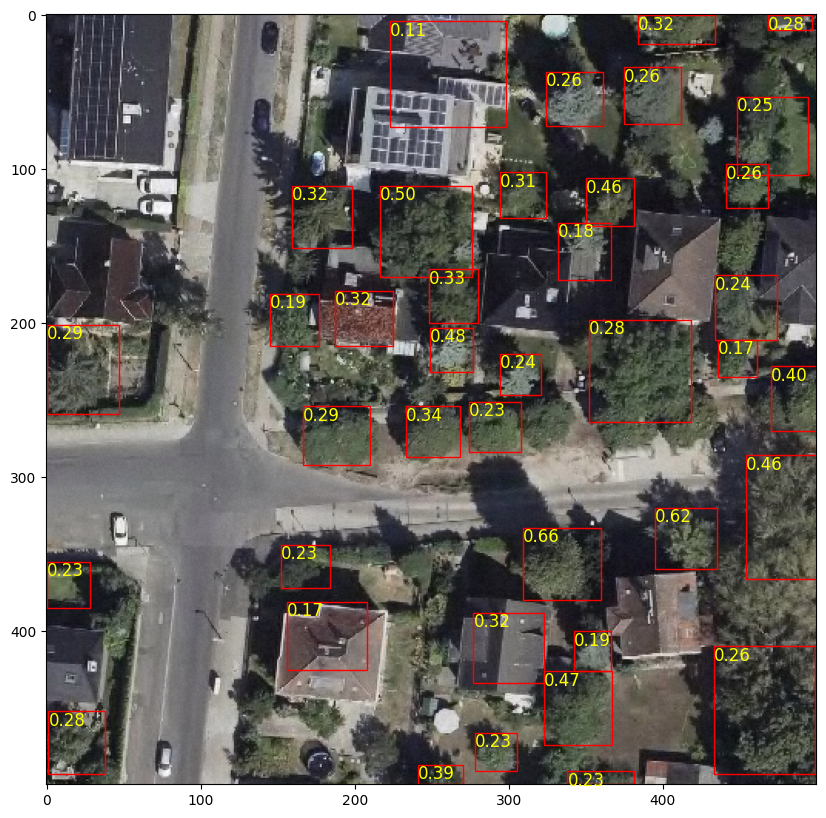

In [ ]:
# Perform tree detection
boxes = model.predict_image(path=tiff_file)

# Show the results
def plot_predictions(image, boxes):
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.transpose((1, 2, 0)))

    for index, row in boxes.iterrows():
        xmin, ymin, xmax, ymax, score = row[['xmin', 'ymin', 'xmax', 'ymax', 'score']]
        rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='red')
        ax.add_patch(rect)
        ax.text(xmin, ymin, f'{score:.2f}', color='yellow', fontsize=12, verticalalignment='top')

    plt.show()

plot_predictions(img, boxes)